<a href="https://colab.research.google.com/github/coutAYUSH/JDBC_PROJECT/blob/main/mpg_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error

Load Dataset

In [ ]:
df = pd.read_csv('MPG (1).csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Describe Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Data Visualization

In [ ]:
df_dummy = df.drop(columns=['origin','name'], axis=1)

In [ ]:
df_dummy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


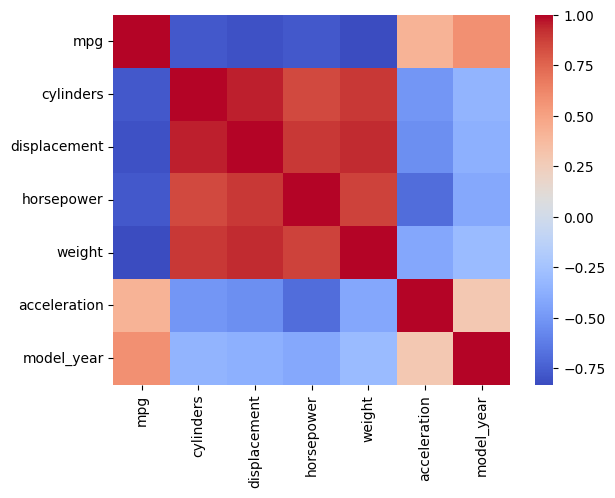

In [ ]:
sns.heatmap(df_dummy.corr(),cmap='coolwarm')
plt.show()

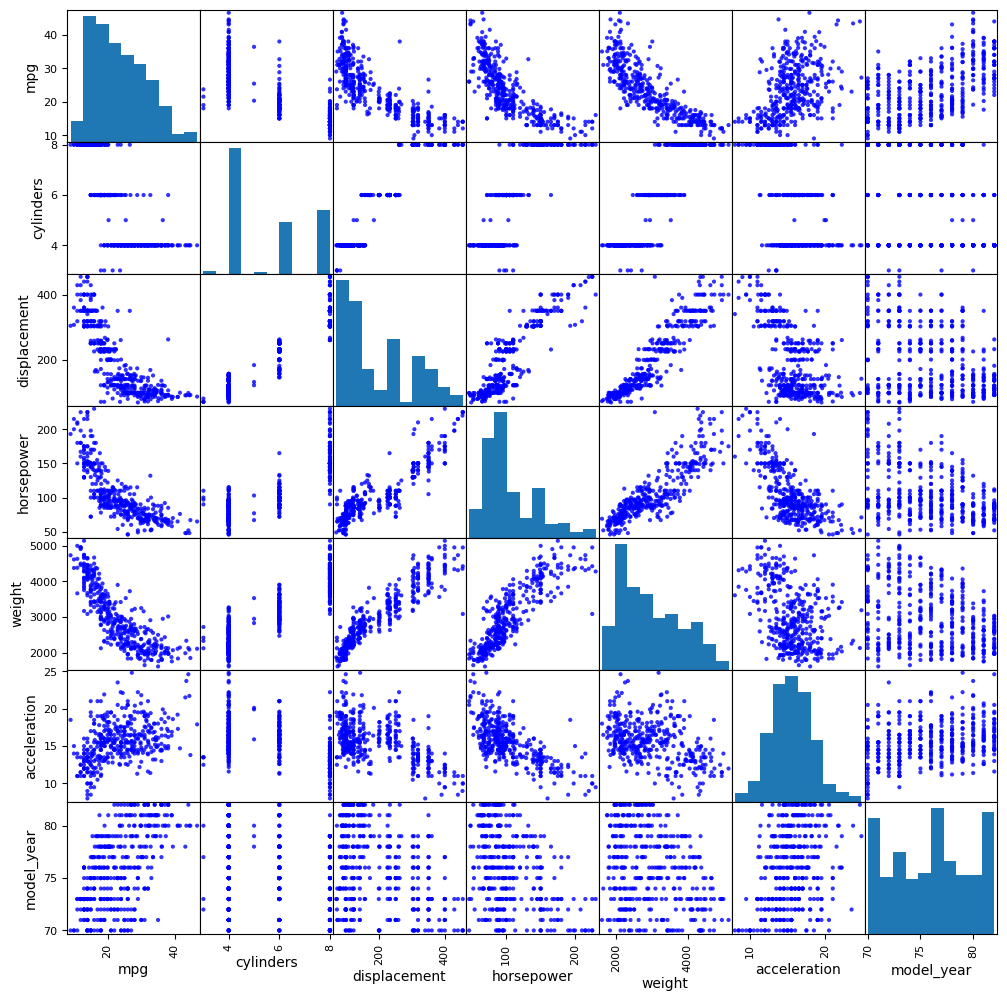

In [ ]:
scatter_matrix(df_dummy, alpha=0.8, figsize=(12, 12), diagonal='hist', color='blue')
plt.show()

Data Prepreocessing

In [ ]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [ ]:
# since very few values are missing so we will drop the rows
df.dropna(inplace=True)

In [ ]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [ ]:
df.drop(columns=['name'], axis=1, inplace=True)

In [ ]:
encoded_df = pd.get_dummies(df, columns=['origin'], dtype=np.int8)

In [ ]:
encoded_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


Define Target and Feature variables

In [ ]:
X = encoded_df.drop(columns=['mpg'], axis=1)
Y = encoded_df['mpg']

In [ ]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

Train-Test Splitting

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

Model Training

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
lr.intercept_

23.515987619103

In [ ]:
lr.coef_

array([-0.58280588,  2.00722317, -0.83113214, -5.44847281,  0.11627027,
        2.93278483,  0.436363  ,  0.59484744, -0.83418709])

Prediction

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([26.62308629, 26.90246949, 34.26598184, 24.44117617, 28.23541424,
       30.1825394 ,  8.56100481, 30.34916333, 20.38153598, 29.44628713,
       12.74639826, 24.90246444, 16.90383129, 29.26573592, 22.69002521,
       29.01139375, 20.1273859 , 33.14407006, 26.35414107, 30.96911914,
       18.62424125, 35.63889895, 35.27942909, 14.81946638, 29.28017777,
       26.41101276, 21.6842468 , 15.83161913, 29.59833633, 24.88379141,
       13.37959723, 23.41302619, 20.81168747, 31.62899703, 12.3989298 ,
       36.04242383, 10.58135858, 23.90100171, 11.19643551,  6.94845354,
       12.68311718, 28.38719238, 35.88785647, 27.18142137, 11.91912268,
        9.97909932, 17.40713084, 32.34687072, 24.02663951, 31.13303701,
       11.85297985, 26.04081368, 22.75426327, 35.0138902 , 28.42903068,
       17.61471732, 20.25432749, 22.65581157, 23.40456421, 25.50148875,
        8.66368711, 22.63841676, 25.63063799, 24.08991433, 29.67539514,
       29.69088567, 25.44467515, 30.32743592, 21.76693112, 10.23

Model Evaluation

In [ ]:
mean_absolute_error(Y_test, y_pred)

2.461999698066147

In [ ]:
mean_absolute_percentage_error(Y_test, y_pred)

0.12039458771155914

In [ ]:
r2_score(Y_test, y_pred)

0.7922774714022582

Explaination

Since our aim is to build a predictive model, so we have used Linear Regression alogrithm to build the model.
Regression model does not handle categorical data well so encoding the data is important.
By check the correlation of features with the target variable we can drop the features which are not correlated.
Model evaluation shows how much error our model is making.